## Setting the analytical solution
Make sure they agree with FLASH/flash.par setting

In [1]:
# import library
import numpy as np
import rclib.IO as rcIO # make sure the lib is linked to the same directory
import rclib.plot as rcplt
from ipywidgets import * 

second      = 1.
centimeter  = 1.
gram        = 1.
erg         = 1.

millisecond = 1.0e-3 * second
meter       = 1e2 * centimeter
kilometer   = 1e3 * meter

Gravitational_constant = 6.673e-8                   # CGS
light_speed            = 3e10 * centimeter / second # [cm s-1]

gamma       = 1.33
profilename = 'Yahil_Gam133.dat'

collapse_time     = 150 * millisecond
central_density   = 7.0e9*gram/(centimeter**3) # [g cm^-3]
central_pressure  = 6.0e27*erg/(centimeter**3)# [erg cm^-3]
core_radius_order = 4.98 # 10^order in [km]
number_element    = 128

kappa = central_pressure / pow( central_density, gamma )
radius = np.logspace(-1, core_radius_order, num=number_element) * kilometer # km

print('kappa =', kappa)

[X1D, D1D, V1D, M1D] = rcIO.IO_YahilProfile(profilename)

kappa = 483248881117108.56
Using YahilProfile/Yahil_Gam133.dat


## Read-in FLASH data and plot data venus analytical solution on same plot

filename = yahil1d_hdf5_chk_0113
time = 0.14903369489235754  s
variable.shape = global_block( 120 ) * sub( 8 ) 
output variable.shape = meaningful block( 110 ) * sub( 8 )
filename = yahil1d_hdf5_chk_0114
time = 0.1498101260728844  s
variable.shape = global_block( 124 ) * sub( 8 ) 
output variable.shape = meaningful block( 112 ) * sub( 8 )


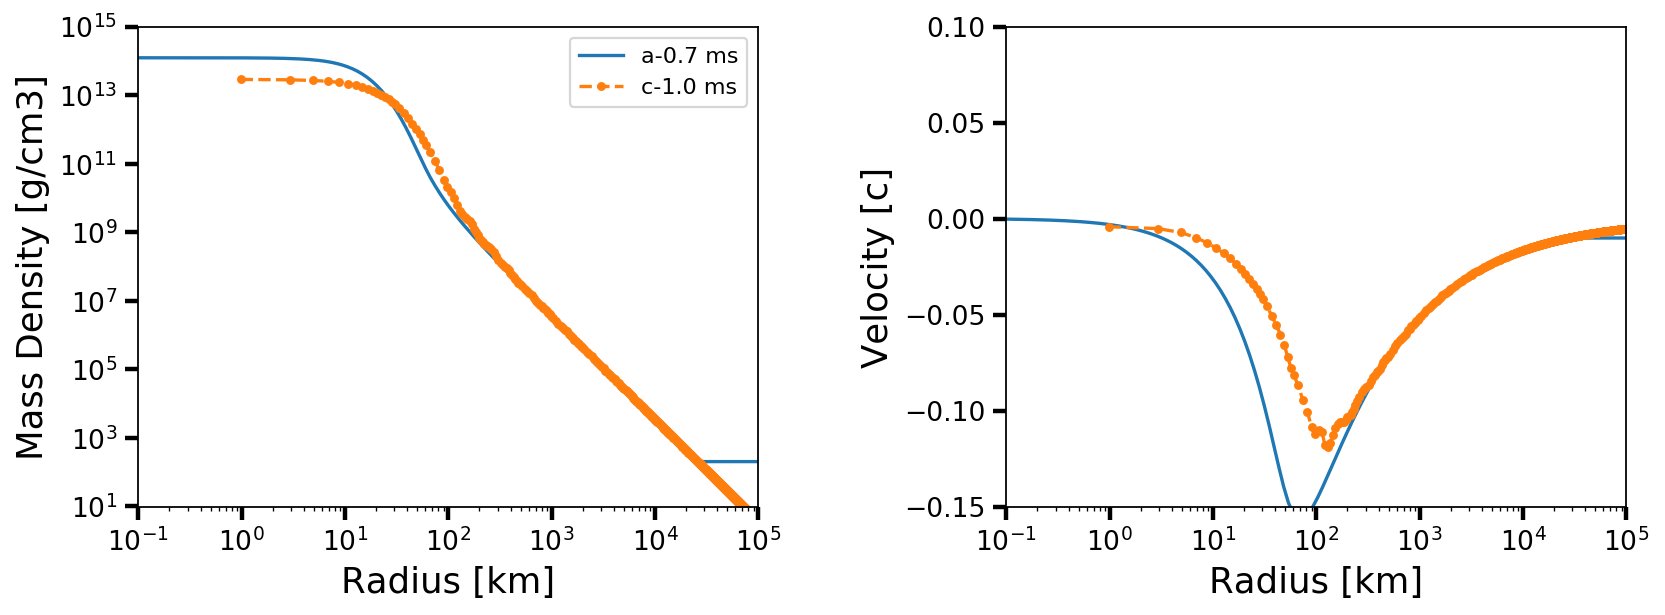

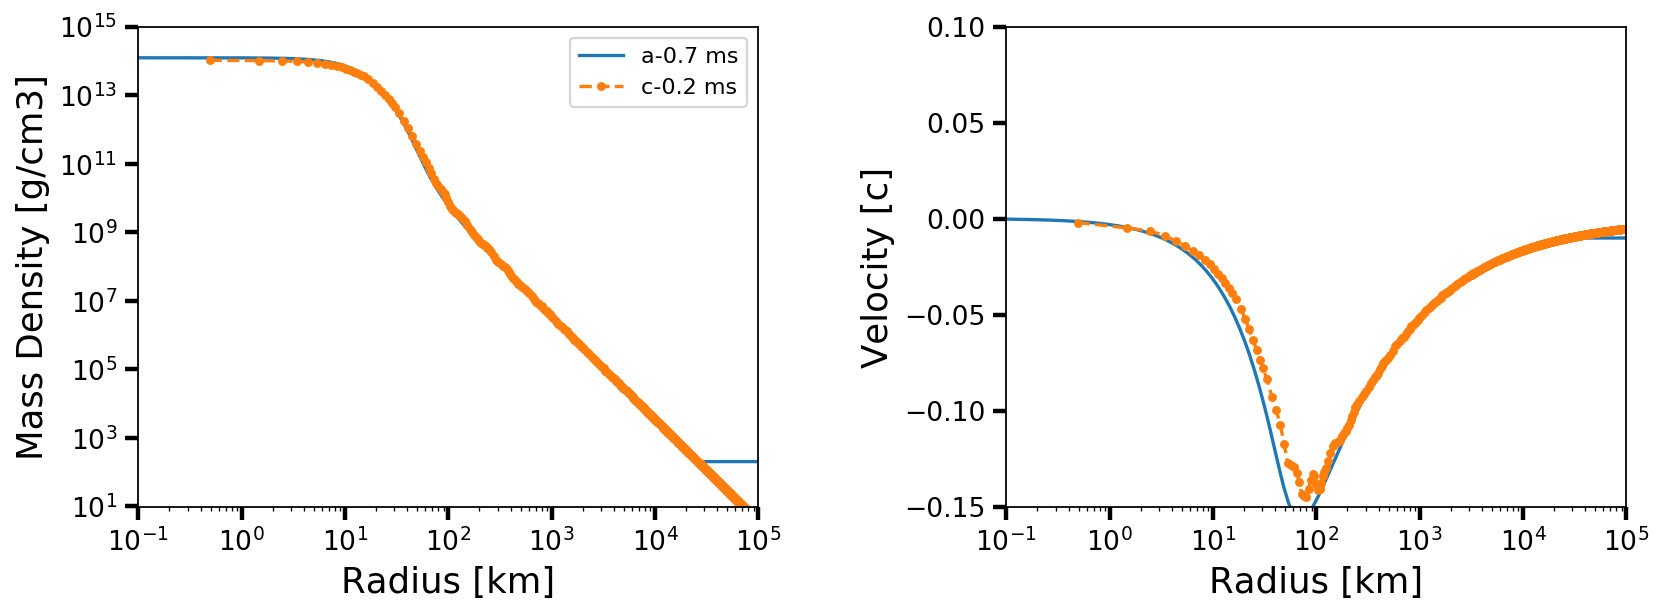

In [5]:
# 0 - initial or ID * 0.001s  (98, 51.5) (145, 5) (148, 2) (150, 0.5)
# 0, 86, 132, 135,137
for fileID in range(113,115):
    # data in
    [ time, radius_1dx, dens_1dx, velx_1dx ] \
    = rcIO.FLASH_IO_1D( '', 'yahil1d_hdf5_chk_', fileID,'', 'nodescribe' ) 
    imag = rcplt.plot_FLASH_Yahil_vs_Analytical\
    ( Gravitational_constant, second, kilometer, light_speed, collapse_time, \
     kappa, gamma, radius, X1D, D1D, V1D, M1D, \
     time, 149.3* millisecond, radius_1dx, dens_1dx, velx_1dx )
    imag.savefig('termp_png/image%03d.png'%fileID)

In [4]:
  fileID = 108
    
  %matplotlib notebook
  import numpy as np
  import matplotlib.pyplot as plt
    
  [ time, radius_1dx, dens_1dx, velx_1dx ] \
    = rcIO.FLASH_IO_1D_partCorrected( '', 'yahil1d_hdf5_chk_', fileID, 'nodescribe' ) 


  # ===========================================================
  fig, axs = plt.subplots(1,2, figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
  #fig = plt.figure()
  fig.subplots_adjust(hspace = 2.5, wspace= 0.4) # (hspace = .5, wspace=.001)

  #axs = axs.ravel()

  test_time = [collapse_time - time* second]
  #test_time = [51. * millisecond, 15. * millisecond, 5. * millisecond, \
  #             1.5 * millisecond, 0.5* millisecond]

  ax1 = plt.subplot(121)
  ax1.legend(loc ='best')
  plt.xlim((1e-1, 1e5))
  plt.ylim((1e1, 1e15))
  plt.xlabel('Radius [km]',fontsize=16)
  plt.ylabel('Mass Density [g/cm3]',fontsize=16)
  ax1.tick_params(direction='out', length=6, width=2, colors='k',
                grid_color='k', grid_alpha=0.5,labelsize = 12)
    
  ax2 = plt.subplot(122,sharex=ax1)
  plt.ylim((-0.15, 0.1))
  plt.xlabel('Radius [km]',fontsize=16)
  plt.ylabel('Velocity [c]',fontsize=16)
  ax2.tick_params(direction='out', length=6, width=2, colors='k',
                grid_color='k', grid_alpha=0.5,labelsize = 12)


  plt.subplots_adjust(bottom=0.25, top=0.75)
    
  for mt in test_time:
    dimensionless_X = pow(kappa,-1/2) * pow(Gravitational_constant,(gamma-1)/2) \
    * radius * pow(mt,gamma-2)
    D_interp = np.interp(dimensionless_X, X1D, D1D)
    V_interp = np.interp(dimensionless_X, X1D, V1D)
    M_interp = np.interp(dimensionless_X, X1D, M1D)

    D = pow(Gravitational_constant,-1) * pow(mt,-2) * D_interp
    V = pow(kappa,1/2) * pow(Gravitational_constant,(1-gamma)/2) \
    * pow(mt,1-gamma) * V_interp
    
    ax1 = fig.add_subplot(121)
    ax1.loglog(radius/kilometer, D,label='a-%.1f'%(mt*1e3)+' ms')
    ax1.loglog(radius_1dx/kilometer, dens_1dx,'--.',\
               label='c-%.1f'%(150-time*1e3)+' ms')
    
    ax2 = fig.add_subplot(122,sharex=ax1)
    ax2.semilogx(radius/kilometer,V/light_speed)
    ax2.semilogx(radius_1dx/kilometer, velx_1dx/light_speed,'--.')


AttributeError: module 'rclib.IO' has no attribute 'FLASH_IO_1D_partCorrected'

In [ ]:
count = 0
count_blk = 0
radius_test = np.zeros(240)
dens_test = np.zeros(240)

for i in range(len(gsurr_blks[:,0,0,0,0])):
    for j in range(len(gsurr_blks[0,0,0,:,0])):
        for k in range(len(gsurr_blks[0,0,0,0,:])):
            if (gsurr_blks[i,0,0,j,k] < -1):
                radius_test[count] = radius_1dx[count_blk]
                dens_test[count] = dens_1dx[count_blk]
                print('[',i,j,k,']  :  ','%3d' % gsurr_blks[i,0,0,j,k], '  count ',count, '  count_blk', count_blk)
                count = count + 1
            count_blk = count_blk + 1
            


In [ ]:
fileID = 0
    
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
    
[ time, gsurr_blks, radius_1dx, dens_1dx, velx_1dx ] \
= rcIO.FLASH_IO_1D( '', 'yahil1d_hdf5_chk_', fileID, 'nodescribe' ) 

space = '  ' 
for i in range(len(radius_1dx)):
    print('%03d'%(i+1),space, '%.02e'%(radius_1dx[i]),\
          space, '%.02e'%(dens_1dx[i]), space, 'v=%.02e'%(velx_1dx[i]))

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import rclib.IO as rcIO

fileID = 0

[ time, gsurr_blks, radius_1dx, dens_1dx, velx_1dx ] \
= rcIO.FLASH_IO_1D( '', 'yahil1d_hdf5_chk_', fileID, 'nodescribe' ) 
test_time = [collapse_time - time* second]

[R_visit, D_visit] = rcIO.IO_VisitCurve('visit_data.txt')

fig, axs = plt.subplots(1,1, figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 2.5, wspace= 0.4) # (hspace = .5, wspace=.001)

plt.subplots_adjust(bottom=0.10, top=0.9)
for mt in test_time:
    dimensionless_X = pow(kappa,-1/2) * pow(Gravitational_constant,(gamma-1)/2) \
    * radius * pow(mt,gamma-2)
    D_interp = np.interp(dimensionless_X, X1D, D1D)
    V_interp = np.interp(dimensionless_X, X1D, V1D)
    M_interp = np.interp(dimensionless_X, X1D, M1D)

    D = pow(Gravitational_constant,-1) * pow(mt,-2) * D_interp
    V = pow(kappa,1/2) * pow(Gravitational_constant,(1-gamma)/2) \
    * pow(mt,1-gamma) * V_interp
    
    ax1 = fig.add_subplot(111)
    ax1.loglog(radius/kilometer, D,label='a')
    ax1.loglog(radius_1dx/kilometer, dens_1dx,'^',\
           label='raw')
    ax1.loglog(radius_test/kilometer, dens_test,'o',\
               label='test')
    ax1.loglog(R_visit/kilometer, D_visit,'.',\
               label='visit')
    
ax1.legend(loc ='best')